In [1]:
## Import necessary libraries 

import os 
import numpy as np 
import pandas as pd 
import tensorflow as tf 
import keras
import datetime as dt
import matplotlib.pyplot as plt 
import urllib.request, json 
from sklearn.preprocessing import MinMaxScaler
from pandas_datareader import data

Using TensorFlow backend.
C:\Users\sunka\Anaconda3\envs\pystable\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


### Data Exploration 

In [2]:
df = pd.read_csv("BAC_10.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,2 days,3 days,5 days (1 week),Open.1,High.1,Low.1,Close.1,Adj Close.1,Volume.1,2 days.1,3 days.1,5 days (1 week).1
0,5/24/2010,6775.439941,6775.439941,6663.169922,6666.740234,6666.740234,5224040000,0.000000,0.000000,0.0,15.98,16.080000,15.39,15.40,13.759591,170656700,0.000000,0.000000,0.0
1,5/25/2010,6666.729980,6669.919922,6451.669922,6665.830078,6665.830078,7329580000,0.000000,0.000000,0.0,14.91,15.540000,14.80,15.49,13.840009,263919800,0.000000,0.000000,0.0
2,5/26/2010,6665.839844,6767.870117,6616.879883,6631.359863,6631.359863,4521050000,-35.380371,0.000000,0.0,15.91,16.100000,15.38,15.47,13.822140,225933000,0.062549,0.000000,0.0
3,5/27/2010,6631.359863,6894.220215,6631.359863,6893.290039,6893.290039,5698460000,227.459961,226.549805,0.0,15.81,16.200001,15.59,16.18,14.456508,163490700,0.616499,0.696917,0.0
4,5/28/2010,6893.290039,6893.290039,6764.709961,6791.569824,6791.569824,4871210000,160.209961,125.739746,0.0,16.17,16.180000,15.71,15.74,14.063376,160778500,0.241236,0.223367,0.0


### Data Visualization

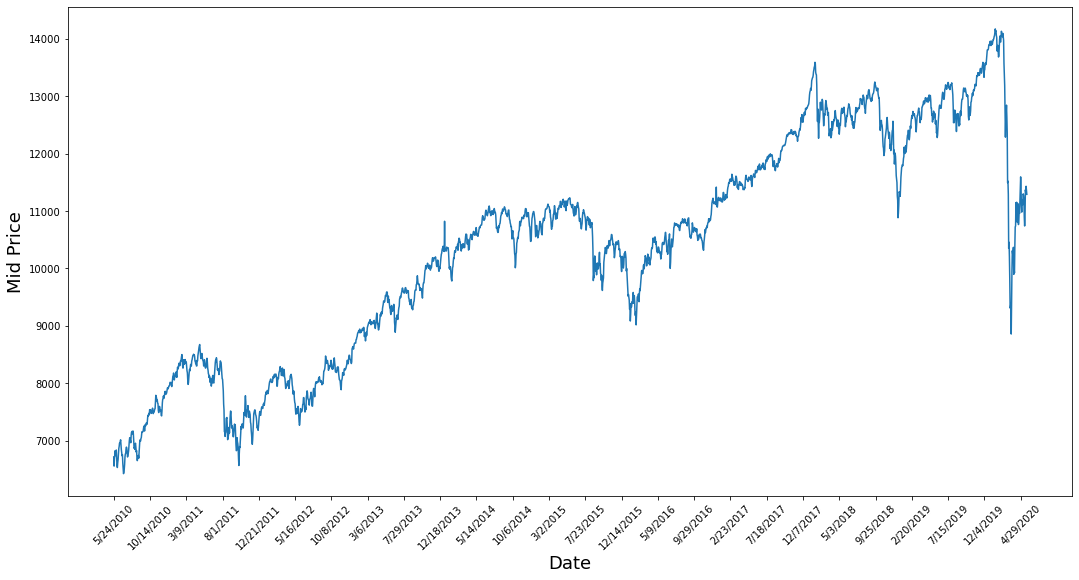

In [4]:
plt.figure(figsize=(18,9))
plt.plot(range(df.shape[0]), (df['Low'] + df['High'])/2.0)

plt.xticks(range(0, df.shape[0],100), df['Date'].loc[::100], rotation=45)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Mid Price', fontsize=18)
plt.show()

### Splitting data into train, test and validation sets

In [12]:
high_prices = df['High']
low_prices = df['Low']

In [13]:
mid_prices = (high_prices + low_prices) / 2.0
print(mid_prices.head())

0    6719.304931
1    6560.794922
2    6692.375000
3    6762.790039
4    6829.000000
dtype: float64


In [ ]:
train, validate, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))]) # 60 %, 20%, 20%